### jeju guest consumption
제주 관광객의 소비업종

제주 읍면동별 세대 및 인구 데이터 참고
https://kosis.kr/statHtml/statHtml.do?orgId=218&tblId=DT_21801N002<br>
소상공인 시장진흥공단_상가(상권)정보 - 제주

In [2]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정
f_path = "/Users/seyoung/Library/Fonts/AppleGothic.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
import os

In [3]:
admin_district_url = '../datas/jeju_district.csv'
district = pd.read_csv(admin_district_url, sep=',', encoding='utf-8', names=['sigungu', 'dong'])
district.tail(2)

,sigungu,dong
41,서귀포시,중문동
42,서귀포시,예래동


In [4]:
admin_district_pivot = district.pivot_table(index='sigungu', values='dong', 
                                           aggfunc=lambda x: ' '.join(x))
# admin_district_pivot.reset_index(inplace=True, drop=True)
admin_district_pivot

,dong
sigungu,
서귀포시,대정읍 남원읍 성산읍 안덕면 표선면 송산동 정방동 중앙동 천지동 효돈동 영천동 동홍...
제주시,한림읍 애월읍 구좌읍 조천읍 한경면 추자면 우도면 일도1동 일도2동 이도1동 이도2...


In [5]:
consumption_url = '../datas/detailed_consume_type_data.csv'
consumption = pd.read_csv(consumption_url, sep=',', encoding='utf-8')

# 관광객 11개 주 소비 업종 
tour_types= ['1급호텔', '2급호텔', '관광여행', '기념품점', '기타숙박업', '렌트카', '면세점', '여객선', '콘도', '특급호텔', '항공사']
data_tour = consumption.loc[consumption.Type.isin(tour_types)]
data_tour.tail(3)

,YM,Sido,Sigungu,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,LargeCategory,MediumCategory
273136,202005,제주특별자치도,서귀포시,일반,콘도,x시,122800,0,3,0,946762.1456,1493244.350,숙박업,휴양콘도 운영업
273150,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,40000,0,1,0,947293.2310,1497145.416,숙박업,여관업
273163,202005,제주특별자치도,서귀포시,중소,기념품점,x시,6000,0,1,0,947543.8498,1496996.675,소매업,관광 민예품 및 선물용품 소매업


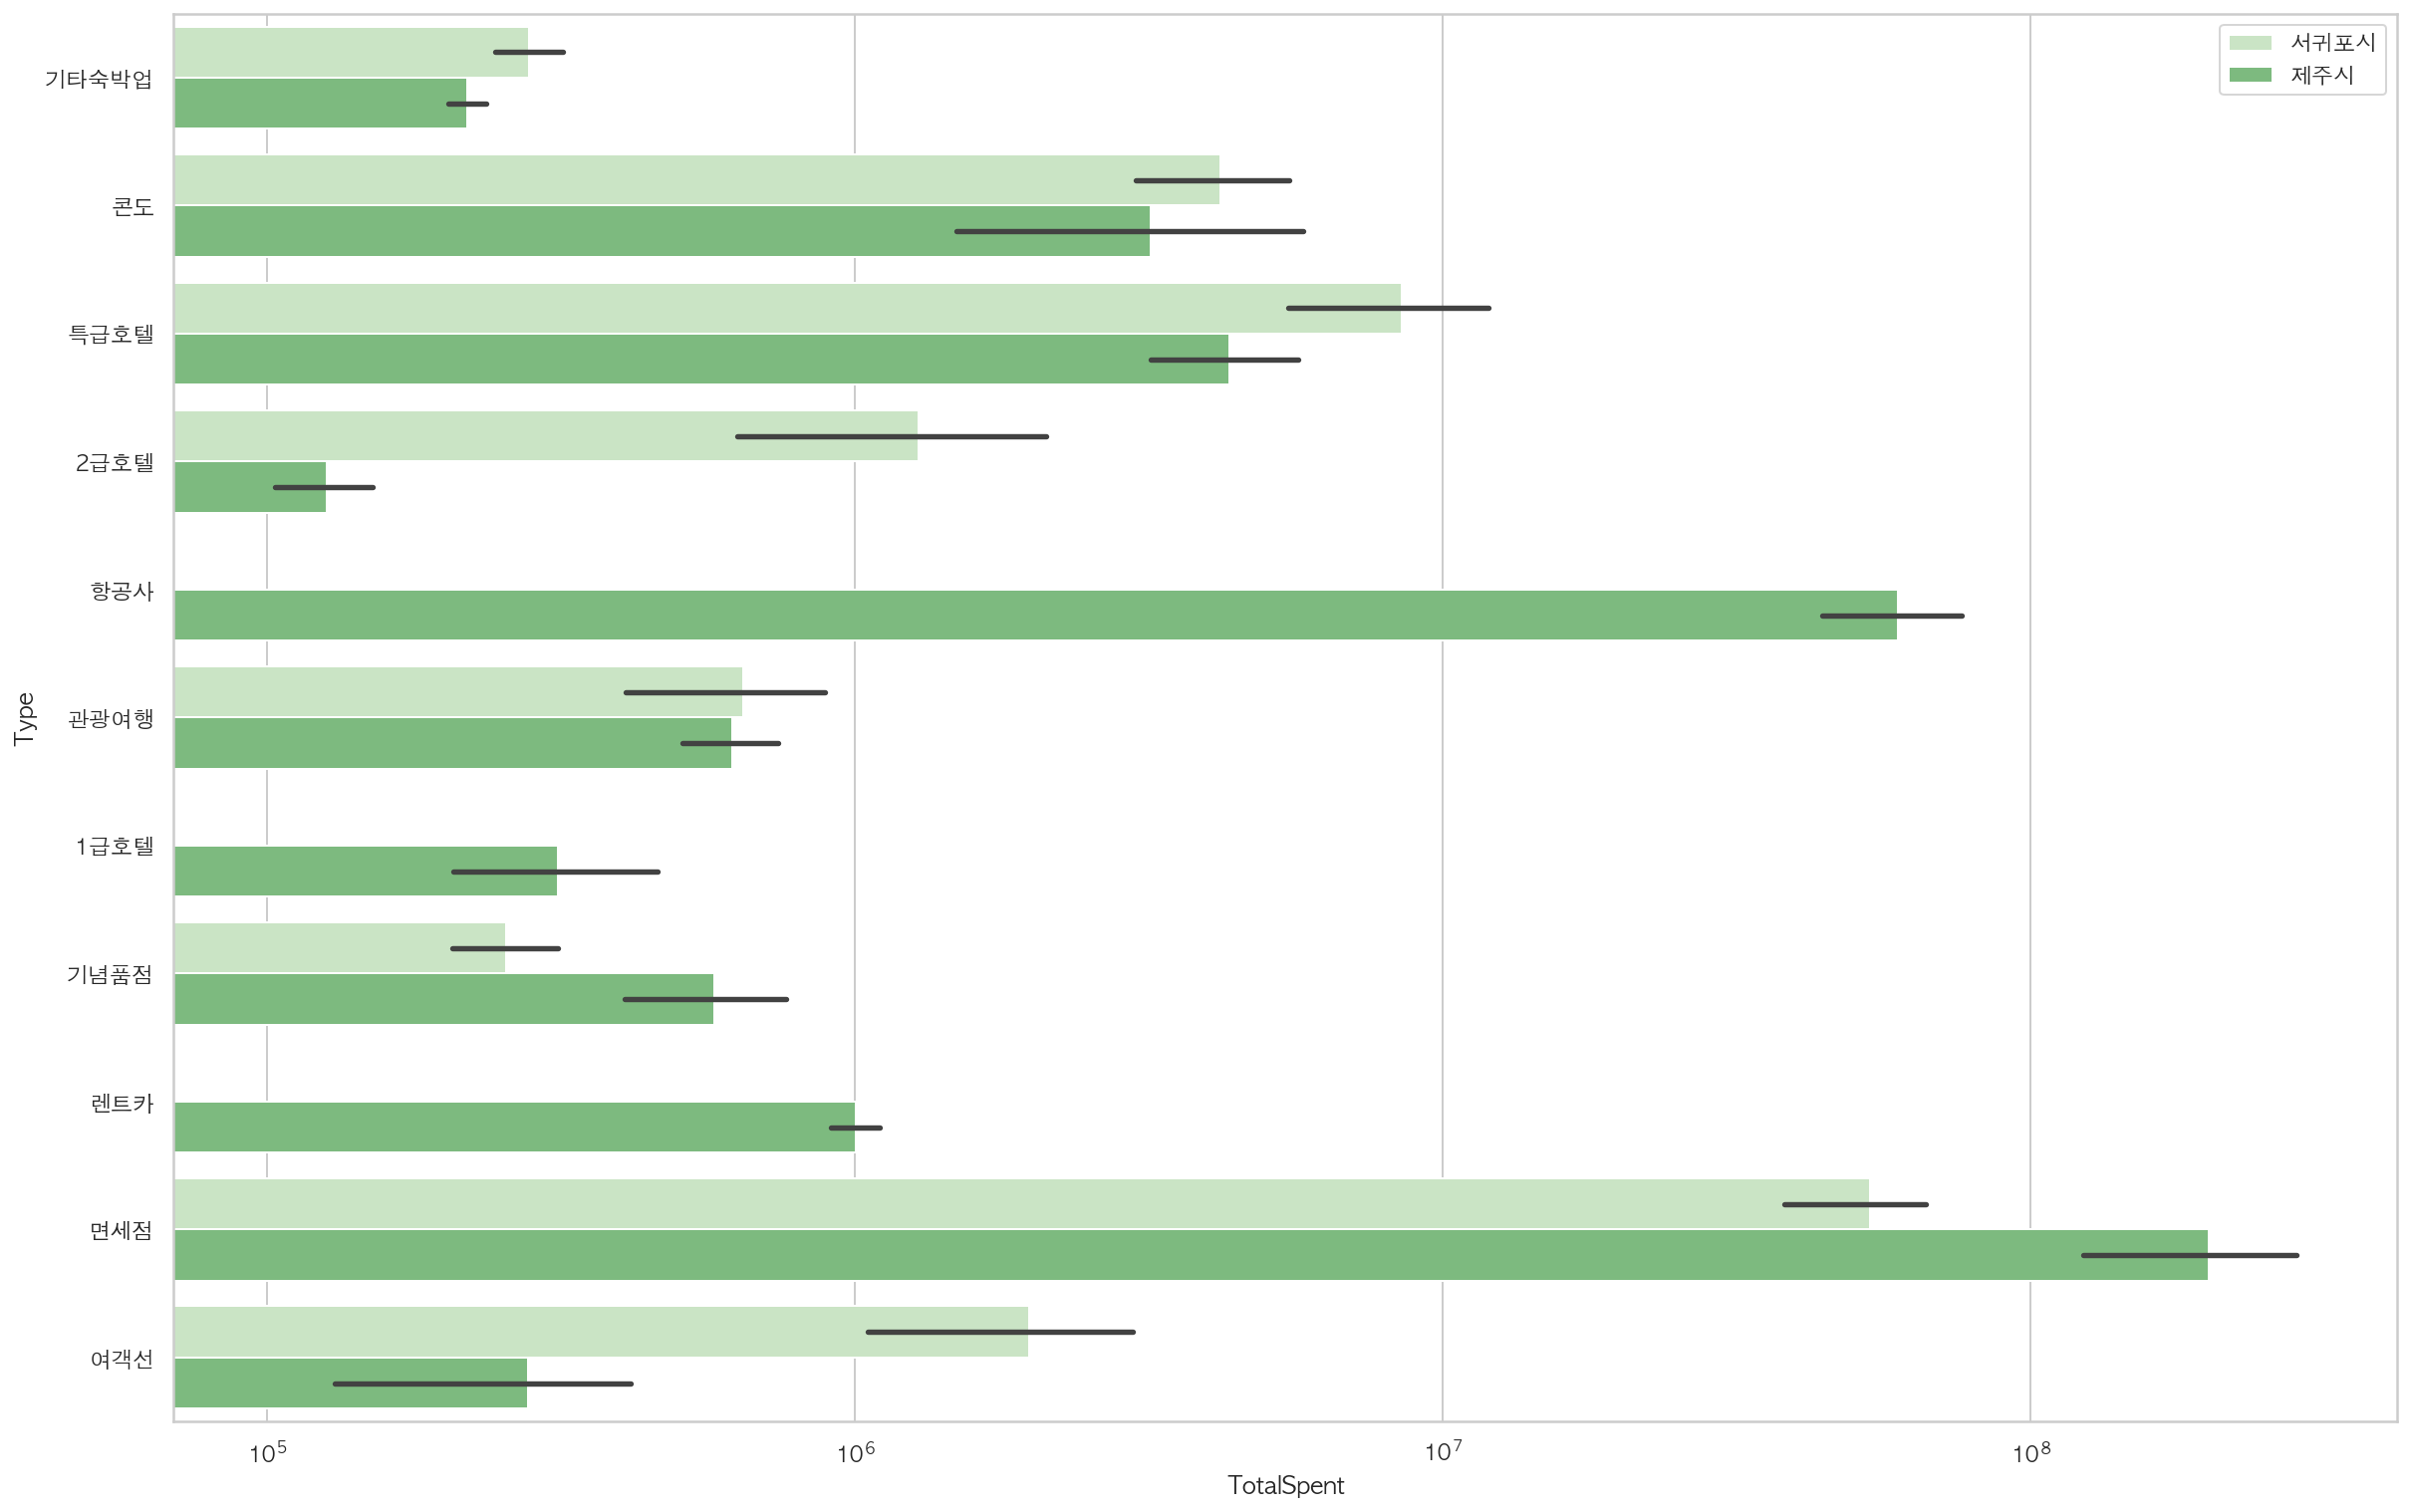

In [124]:
sigungu_1 = data_tour.loc[data_tour.Sigungu.isin(['서귀포시'])]
sigungu_2 = data_tour.loc[data_tour.Sigungu.isin(['제주시'])]

sns.set(rc={'axes.unicode_minus':False}, font='AppleGothic', style='whitegrid')
sns.set_palette('Greens', 3)

plt.figure(figsize=(20,13))
sns.barplot(x='TotalSpent', y='Type', hue='Sigungu', data=data_tour, log='y')

plt.legend()
plt.show()
